In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline


In [2]:
# Load the user reviews dataset
user_reviews = pd.read_csv('user_reviews.csv')

# Load the apps data dataset
apps_data = pd.read_csv('apps_data.csv')


In [3]:
print("User Reviews:\n", user_reviews.head(), "\n")
print("Apps Data:\n", apps_data.head())


User Reviews:
                      App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000   

Apps Data:
                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN

In [4]:
print("Missing values in user_reviews:\n", user_reviews.isnull().sum())
print("\nMissing values in apps_data:\n", apps_data.isnull().sum())


Missing values in user_reviews:
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Missing values in apps_data:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


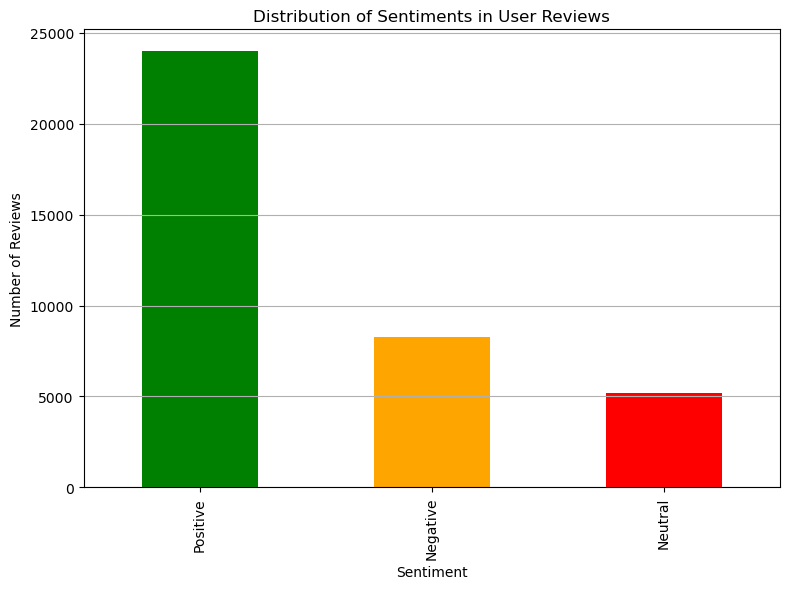

In [7]:
sentiment_counts = user_reviews_cleaned['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

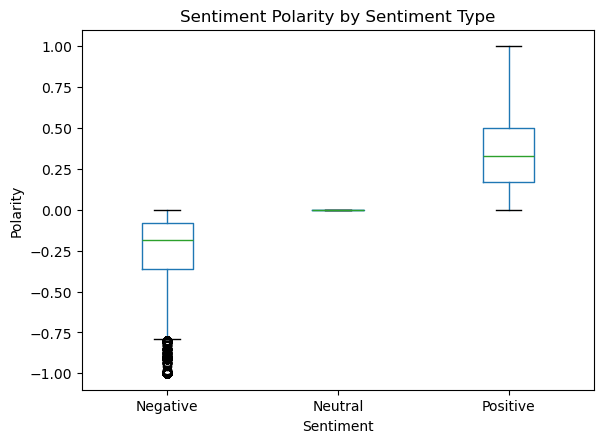

In [8]:
plt.figure(figsize=(8, 6))
user_reviews_cleaned.boxplot(column='Sentiment_Polarity', by='Sentiment', grid=False)
plt.title('Sentiment Polarity by Sentiment Type')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.show()


In [9]:
# Merge datasets on App name
merged_df = pd.merge(user_reviews_cleaned, apps_data_cleaned, on='App')
merged_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


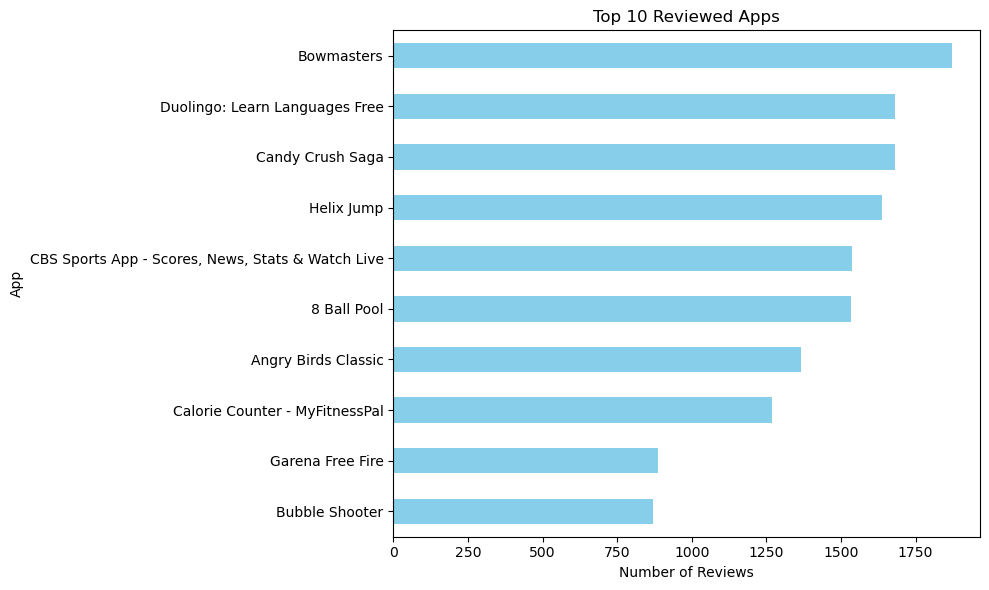

In [10]:
top_apps = merged_df['App'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_apps.plot(kind='barh', color='skyblue')
plt.title('Top 10 Reviewed Apps')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


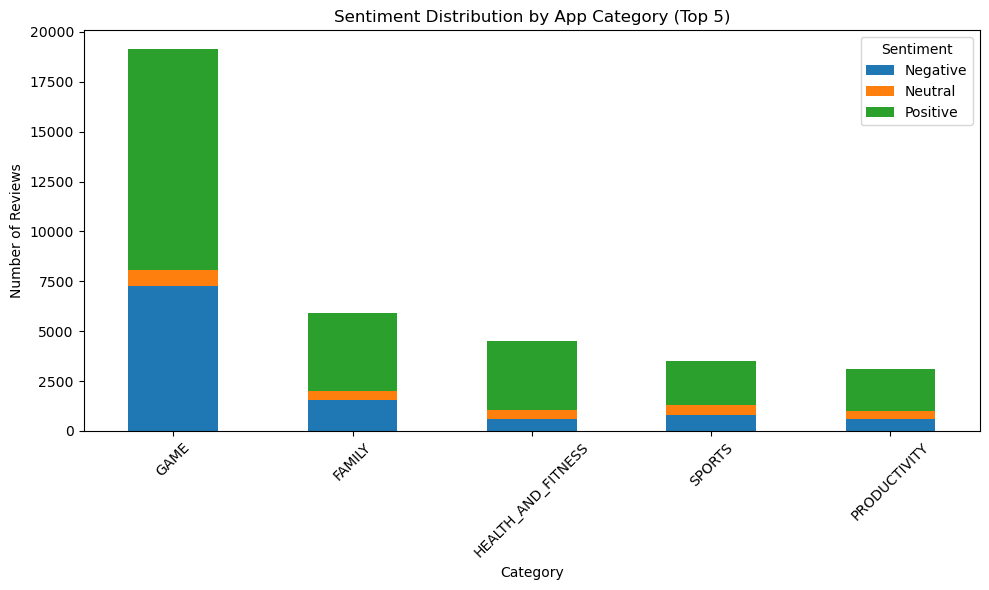

In [11]:
category_sentiments = merged_df.groupby('Category')['Sentiment'].value_counts().unstack().fillna(0)

# Plot for top 5 categories
category_sentiments_top5 = category_sentiments.sort_values(by='Positive', ascending=False).head(5)
category_sentiments_top5.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by App Category (Top 5)')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


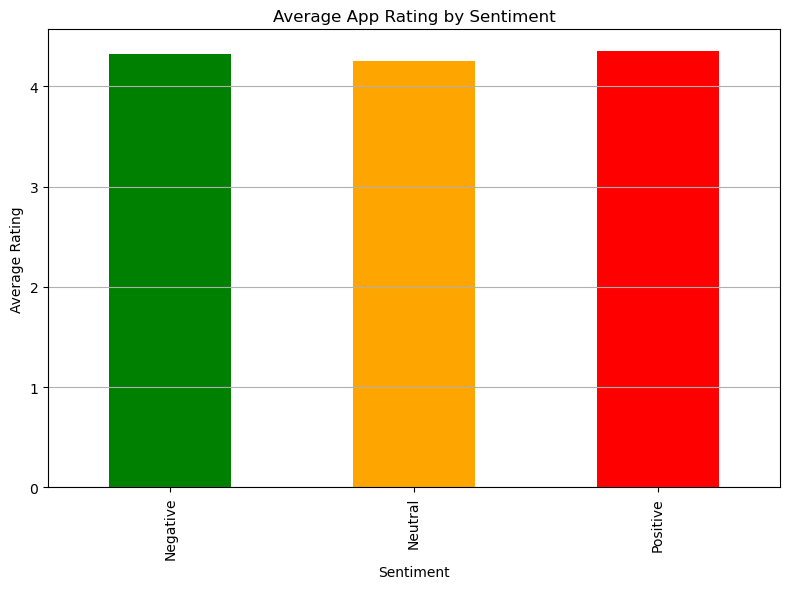

In [12]:
avg_rating_sentiment = merged_df.groupby('Sentiment')['Rating'].mean()

plt.figure(figsize=(8, 6))
avg_rating_sentiment.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average App Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


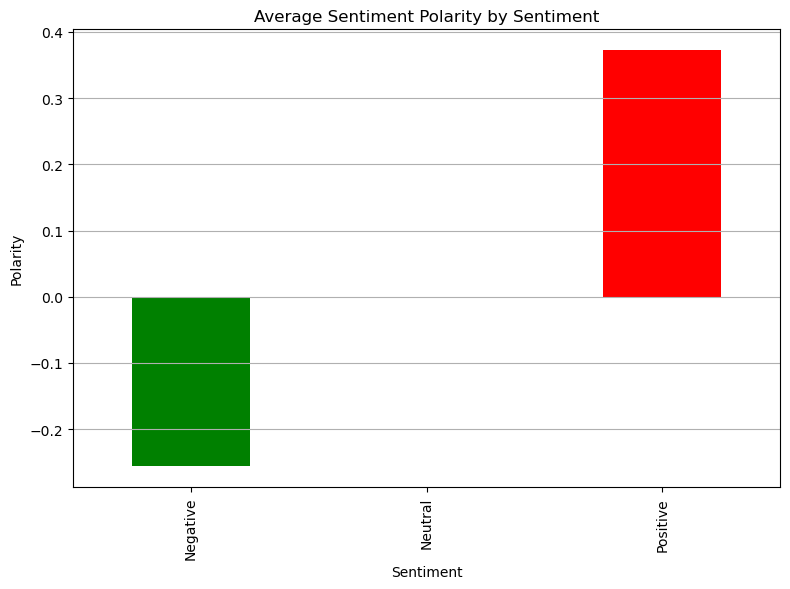

In [13]:
avg_polarity = user_reviews_cleaned.groupby('Sentiment')['Sentiment_Polarity'].mean()

plt.figure(figsize=(8, 6))
avg_polarity.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average Sentiment Polarity by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

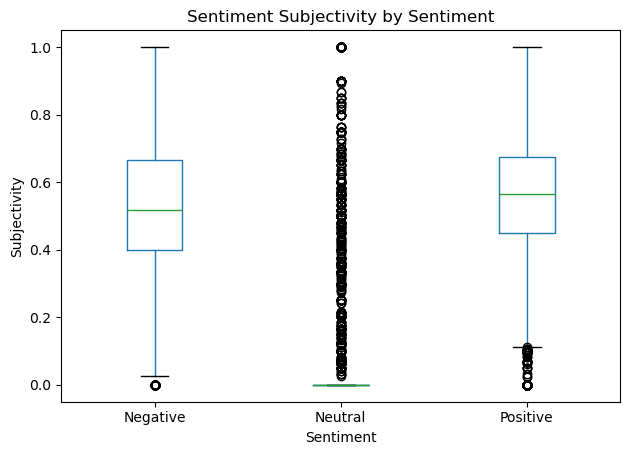

In [14]:
plt.figure(figsize=(8, 6))
user_reviews_cleaned.boxplot(column='Sentiment_Subjectivity', by='Sentiment', grid=False)
plt.title('Sentiment Subjectivity by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')
plt.tight_layout()
plt.show()


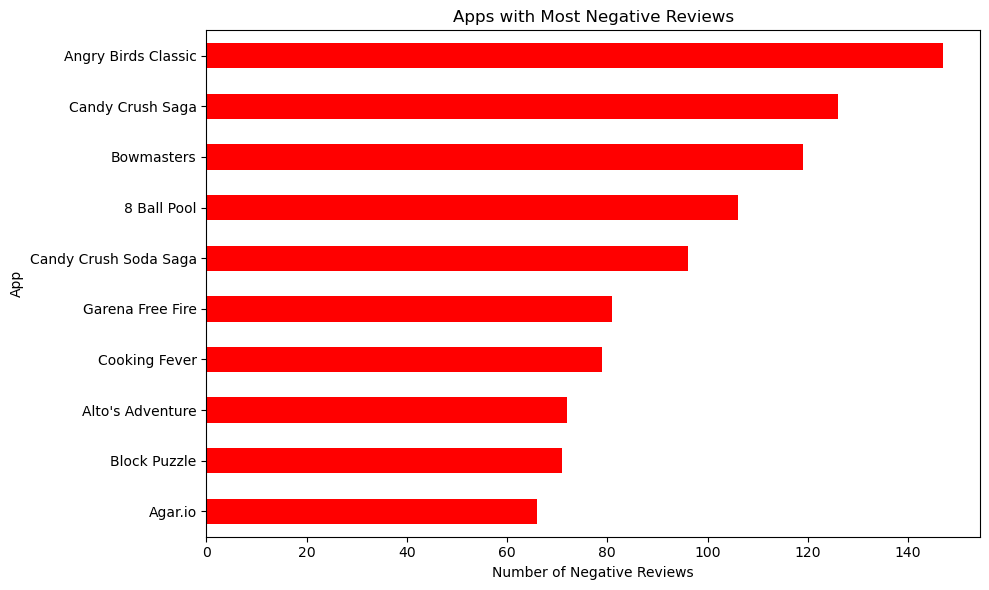

In [15]:
negative_reviews = user_reviews_cleaned[user_reviews_cleaned['Sentiment'] == 'Negative']
neg_review_counts = negative_reviews['App'].value_counts().head(10)

plt.figure(figsize=(10, 6))
neg_review_counts.plot(kind='barh', color='red')
plt.title('Apps with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


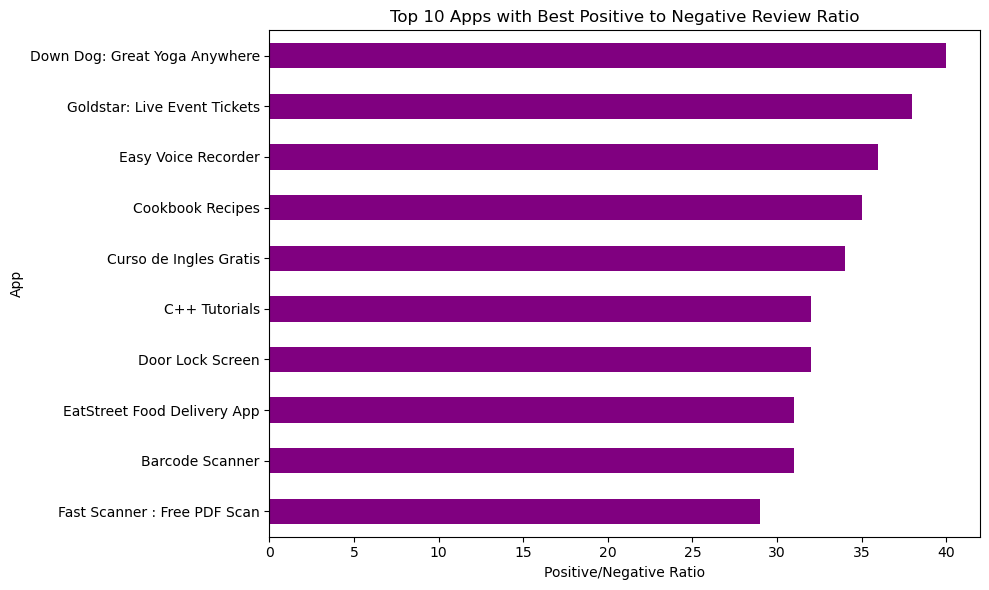

In [16]:
# Count sentiments per app
sentiment_per_app = user_reviews_cleaned[user_reviews_cleaned['Sentiment'].isin(['Positive', 'Negative'])]
sentiment_ratio = sentiment_per_app.groupby(['App', 'Sentiment']).size().unstack().fillna(0)

# Calculate ratio and sort
sentiment_ratio['Ratio'] = sentiment_ratio['Positive'] / (sentiment_ratio['Negative'] + 1)
top_ratio = sentiment_ratio.sort_values(by='Ratio', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_ratio['Ratio'].plot(kind='barh', color='purple')
plt.title('Top 10 Apps with Best Positive to Negative Review Ratio')
plt.xlabel('Positive/Negative Ratio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [18]:
merged_df = pd.merge(user_reviews_cleaned, apps_data_cleaned, on='App')
print(merged_df.head())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
2  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You    This help eating healthy exercise regular basis   
4  10 Best Foods for You         Works great especially going grocery store   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity            Category  \
0  Positive                1.00                0.533333  HEALTH_AND_FITNESS   
1  Positive                1.00                0.533333  HEALTH_AND_FITNESS   
2  Positive                0.25                0.288462  HEALTH_AND_FITNESS   
3  Positive                0.25                0.288462  HEALTH_AND_FITNESS   
4  Positive                0.40                0.875000  HEALTH_AND_FITNESS   

   Rating Reviews  Size  Installs  Type Price Cont

In [19]:
top_apps = merged_df['App'].value_counts().head(10)
print(top_apps)


App
Bowmasters                                           1872
Duolingo: Learn Languages Free                       1680
Candy Crush Saga                                     1680
Helix Jump                                           1638
CBS Sports App - Scores, News, Stats & Watch Live    1536
8 Ball Pool                                          1533
Angry Birds Classic                                  1365
Calorie Counter - MyFitnessPal                       1270
Garena Free Fire                                      888
Bubble Shooter                                        870
Name: count, dtype: int64


In [20]:
negative_reviews = user_reviews_cleaned[user_reviews_cleaned['Sentiment'] == 'Negative']
neg_review_counts = negative_reviews['App'].value_counts().head(10)
print(neg_review_counts)


App
Angry Birds Classic      147
Candy Crush Saga         126
Bowmasters               119
8 Ball Pool              106
Candy Crush Soda Saga     96
Garena Free Fire          81
Cooking Fever             79
Alto's Adventure          72
Block Puzzle              71
Agar.io                   66
Name: count, dtype: int64
